<a href="https://colab.research.google.com/github/PedroCarraro/Concurso_Alura/blob/main/Concurso_Alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importações.

Importação das bibliotecas utilizadas no projeto.

In [104]:
import pandas as pd

import seaborn as sns
print(sns.__version__)

import matplotlib.pyplot as plt
!pip install fsspec


0.11.2


Importação dos dados utilizados.

In [105]:
dados = pd.read_csv('http://www.educacao.pr.gov.br/sites/default/arquivos_restritos/files/documento/2021-11/edutech_comparativos_metricas.csv', sep= ';' )
dados = dados.iloc[::-1]
dados.reset_index(drop= True, inplace = True)

# Funções.

Funções utilizadas para a demonstração dos gráficos.

In [106]:
def plotar(titulo, x, y, dataset, legendaX, legendaY):
  sns.set_palette('Blues_r') 
  sns.set_style('darkgrid')
  ax = sns.lineplot(x = x, y = y, data= dataset)
  ax.figure.set_size_inches(16, 8)
  ax.set_title(titulo, loc= 'left', fontsize= 18) 
  ax.set_xlabel(legendaX, fontsize= 14) 
  ax.set_ylabel(legendaY, fontsize= 14)

In [107]:
def plot_com_legenda(titulo, x, y, dataset, legendaX, legendaY, hue):
  sns.set_palette('Blues') 
  sns.set_style('darkgrid')
  ax = sns.lineplot(x = x, y = y, data= dataset, hue= hue)
  ax.figure.set_size_inches(16, 8)
  ax.set_title(titulo, loc= 'left', fontsize= 18) 
  ax.set_xlabel(legendaX, fontsize= 14) 
  ax.set_ylabel(legendaY, fontsize= 14)

In [108]:
def barplot(titulo,  x, y,  dataset, legendaX, legendaY):
  sns.set_style('darkgrid')
  ax = sns.barplot(data= dataset, x= x, y= y, palette= 'Blues')
  ax.figure.set_size_inches(16, 8)
  ax.set_title(titulo, loc= 'left', fontsize= 18) 
  ax.set_xlabel(legendaX, fontsize= 14) 
  ax.set_ylabel(legendaY, fontsize= 14)

In [109]:
def regplot(titulo, x, y, legendaX, legendaY):
  sns.set_palette('Blues_r') 
  sns.set_style('darkgrid')
  ax = sns.regplot(x= x, y= y)
  ax.figure.set_size_inches(16, 8)
  ax.set_title(titulo, loc= 'left', fontsize= 18) 
  ax.set_xlabel(legendaX, fontsize= 14) 
  ax.set_ylabel(legendaY, fontsize= 14)
  ax = ax

# Renomeando as Colunas.

DataFrame antes da renomeação das colunas.

In [110]:
dados.head()

,Ano Censo,Número de Vagas Oferecidas,Número de Tipo de Ingressos,Número de Matrículas,Número de Concluintes,Número de Inscritos,Número de Cursos,Nome Região
0,2009,471865.0,273166.0,865936,136337,791152.0,5386.0,SUL
1,2009,1998509.0,891797.0,2516712,447811,3764394.0,13278.0,SUDESTE
2,2009,193168.0,105915.0,313959,43592,499657.0,2004.0,NORTE
3,2009,515028.0,294711.0,965502,130829,1508888.0,4655.0,NORDESTE
4,2009,335822.0,167024.0,453787,68359,616115.0,2504.0,CENTRO-OESTE


In [111]:
dados.columns

Index(['Ano Censo', 'Número de Vagas Oferecidas',
       'Número de Tipo de Ingressos', 'Número de Matrículas',
       'Número de Concluintes', 'Número de Inscritos', 'Número de Cursos',
       'Nome Região'],
      dtype='object')

Dicionário e código criado para a renomeação das colunas.

In [112]:
colunas_renomeadas = {'Ano Censo' : 'ano_censo',
                      'Número de Vagas Oferecidas' : 'numero_de_vagas_oferecidas',
                      'Número de Tipo de Ingressos' : 'numero_de_tipo_de_ingressos',
                      'Número de Matrículas' : 'numero_de_matriculas',
                      'Número de Concluintes' : 'numero_de_concluintes',
                      'Número de Inscritos' : 'numero_de_inscritos', 
                      'Número de Cursos' : 'numero_de_cursos',
                      'Nome Região' : 'nome_regiao'}

dados.rename(columns= colunas_renomeadas, inplace= True)

DataFrame depois da renomeação das colunas.

In [113]:
dados.head()

,ano_censo,numero_de_vagas_oferecidas,numero_de_tipo_de_ingressos,numero_de_matriculas,numero_de_concluintes,numero_de_inscritos,numero_de_cursos,nome_regiao
0,2009,471865.0,273166.0,865936,136337,791152.0,5386.0,SUL
1,2009,1998509.0,891797.0,2516712,447811,3764394.0,13278.0,SUDESTE
2,2009,193168.0,105915.0,313959,43592,499657.0,2004.0,NORTE
3,2009,515028.0,294711.0,965502,130829,1508888.0,4655.0,NORDESTE
4,2009,335822.0,167024.0,453787,68359,616115.0,2504.0,CENTRO-OESTE


# Tratando casos nulos.

Código utilizado para identificar onde estão localizados os dados nulos.

In [114]:
dados.isna().sum()

ano_censo                       0
numero_de_vagas_oferecidas      2
numero_de_tipo_de_ingressos    11
numero_de_matriculas            0
numero_de_concluintes           0
numero_de_inscritos             2
numero_de_cursos                3
nome_regiao                     0
dtype: int64

Como os dados da coluna "numero_de_tipo_de_ingressos" não afetam a análise eles foram substituidos por zero.

In [115]:
dados.numero_de_tipo_de_ingressos.fillna(value= 0, inplace= True)

O restante dos dados nulos prejudicavam a análise dos demais, logo, eles foram removidos do DataFrame.

In [116]:
dados.dropna(inplace=True)

# Informando as taxas de crescimento ou decaimento ano a ano para todas as regiões do Brasil.

Código utilizado para separar o DataFrame com base nas regiões. 

In [117]:
dados_nordeste = dados.query('nome_regiao == "NORDESTE"')
dados_norte = dados.query('nome_regiao == "NORTE"')
dados_sudeste = dados.query('nome_regiao == "SUDESTE"')
dados_sul = dados.query('nome_regiao == "SUL"')
dados_centro_oeste = dados.query('nome_regiao == "CENTRO-OESTE"')
dados_brasil = dados.query('nome_regiao == "BRASIL"')

dados_regioes = [dados_brasil, dados_centro_oeste, dados_nordeste, dados_norte, dados_sudeste, dados_sul]

Laço de repetição usado para criar a coluna de crescimento ou decaimento do número de iscritos no DataFrame de cada região.

In [ ]:
for regiao in dados_regioes:
  regiao['aumento'] = regiao.numero_de_inscritos.diff()
  regiao.fillna(value= 0, inplace= True)

Exibindo os gráficos de crecimento e decaimento do número de inscritos.

**NORDESTE**

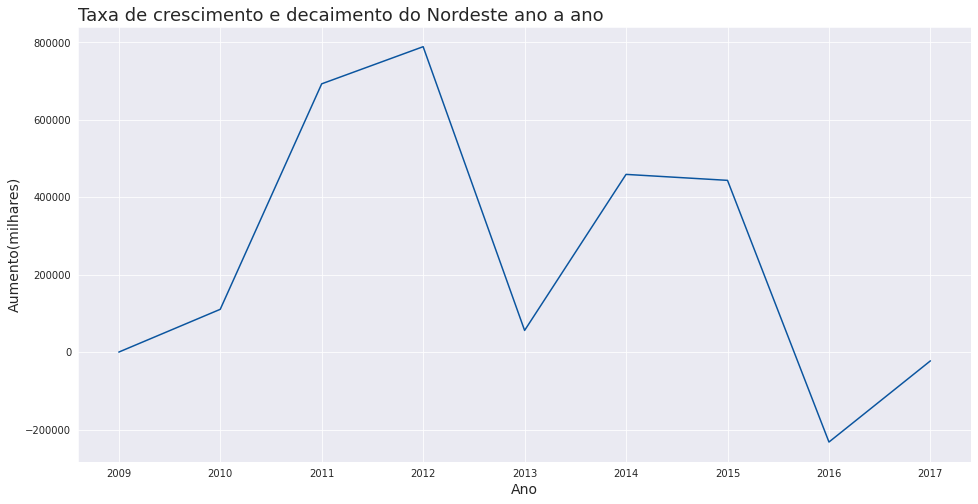

In [119]:
plotar('Taxa de crescimento e decaimento do Nordeste ano a ano', 'ano_censo', 'aumento',  dados_nordeste, 'Ano', 'Aumento(milhares)')

Nota-se um aumento significativo no período de 2009 até 2012 seguido de uma queda expressiva até 2013, logo após, um leve aumento até 2014 seguido por um período de estabilidade de um ano que antecede uma queda brusca até 2016.

**NORTE**

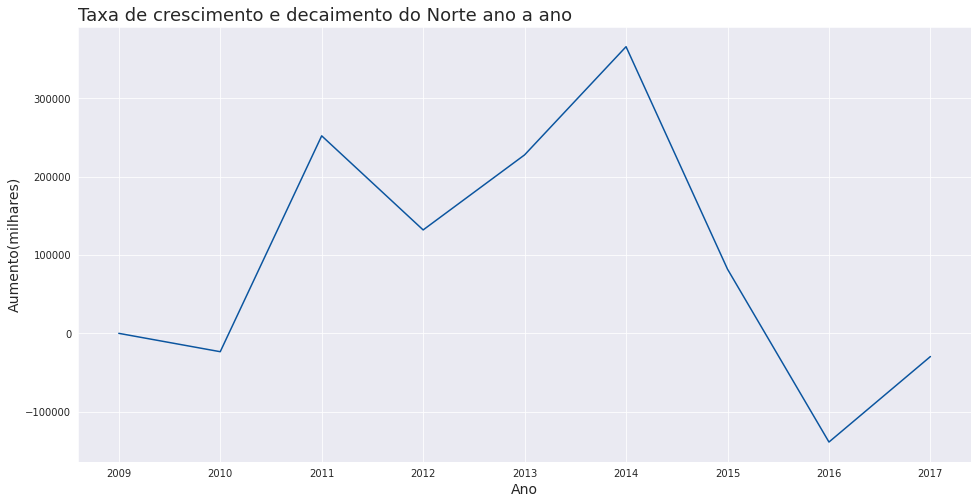

In [120]:
plotar('Taxa de crescimento e decaimento do Norte ano a ano', 'ano_censo', 'aumento',  dados_norte, 'Ano', 'Aumento(milhares)')

É perceptível um aumento de 2010 a 2011 seguido por uma queda e um aumento até 2014 que antecede uma queda expressiva até 2016.

**SUDESTE**

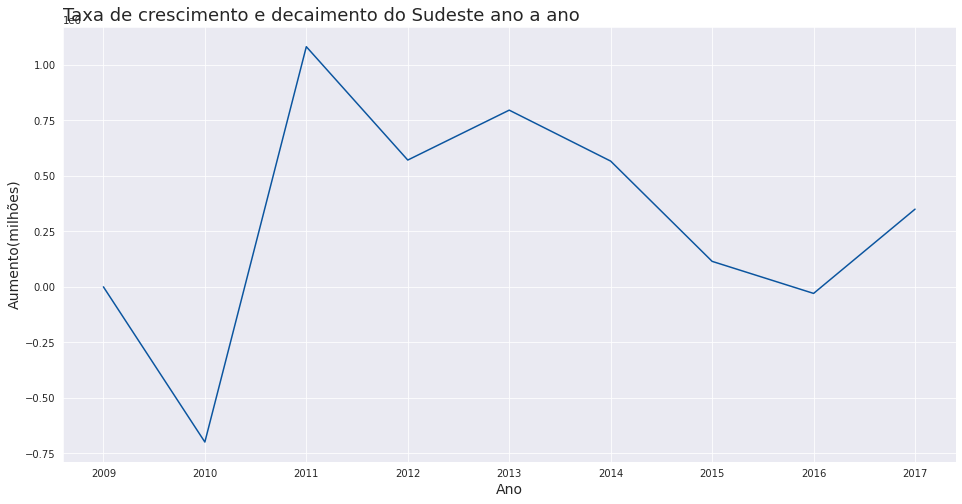

In [121]:
plotar('Taxa de crescimento e decaimento do Sudeste ano a ano', 'ano_censo', 'aumento',  dados_sudeste, 'Ano', 'Aumento(milhões)')

Visualmente o gráfico apresenta uma queda leviana no período de tempo de 2009 a 2010, a mesma é seguida por aumento expressivo durante um ano. 

**SUL**

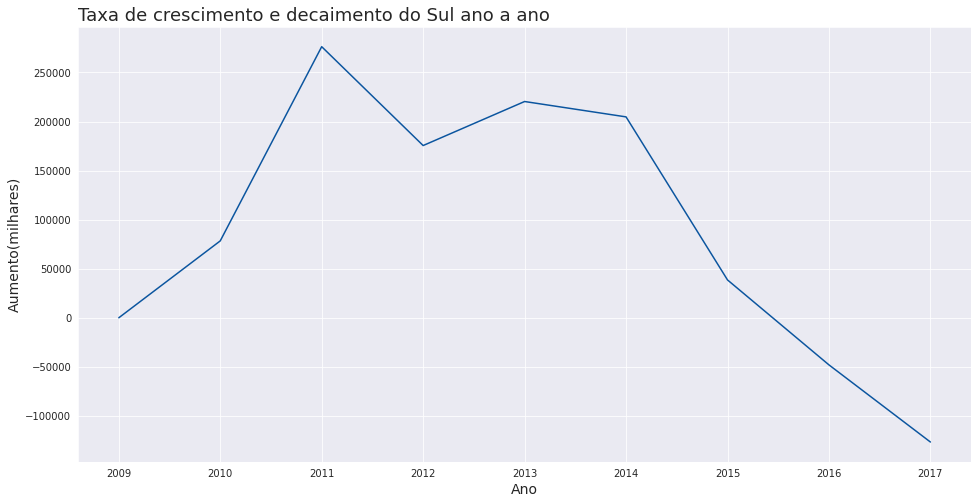

In [122]:
plotar('Taxa de crescimento e decaimento do Sul ano a ano', 'ano_censo', 'aumento',  dados_sul, 'Ano', 'Aumento(milhares)')

Pode-se perceber um aumento significativo no número de inscritos de 2009 até 2011 seguido por um período de relativa estabilidade até 2014 onde é visível uma queda expressiva até 2017.

  **CENTRO-OESTE**

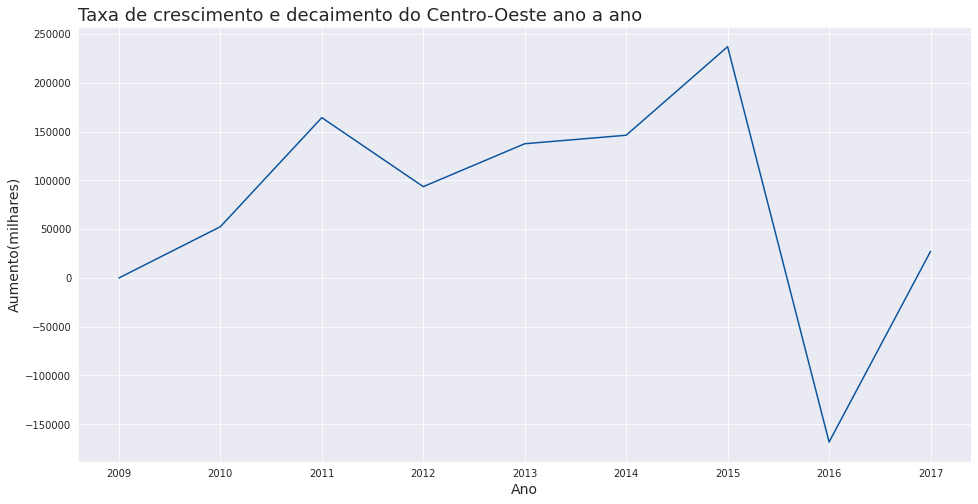

In [123]:
plotar('Taxa de crescimento e decaimento do Centro-Oeste ano a ano', 'ano_censo', 'aumento',  dados_centro_oeste, 'Ano', 'Aumento(milhares)')

O gráfico apresenta um constante aumento de 2009 até 2015 onde ocorreu uma grande queda até 2016, onde os valores voltam a subir.

#  Informarndo o número de vagas oferecidas por região ano a ano.

**NORDESTE**

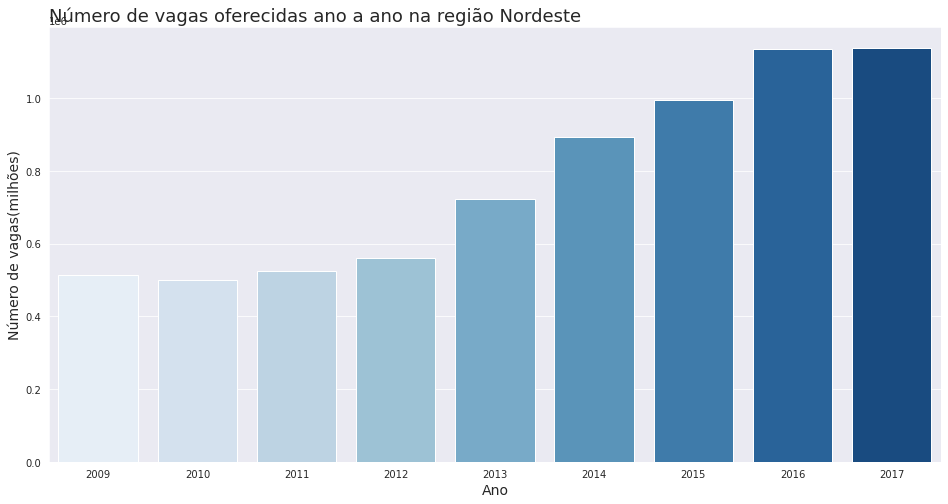

In [124]:
barplot('Número de vagas oferecidas ano a ano na região Nordeste', 'ano_censo', 'numero_de_vagas_oferecidas', dados_nordeste, 'Ano', 'Número de vagas(milhões)')

In [125]:
print('O total de vagas oferecidas foi de {} vagas'.format(dados_nordeste.numero_de_vagas_oferecidas.sum()))

O total de vagas oferecidas foi de 6986695.0 vagas


**NORTE**

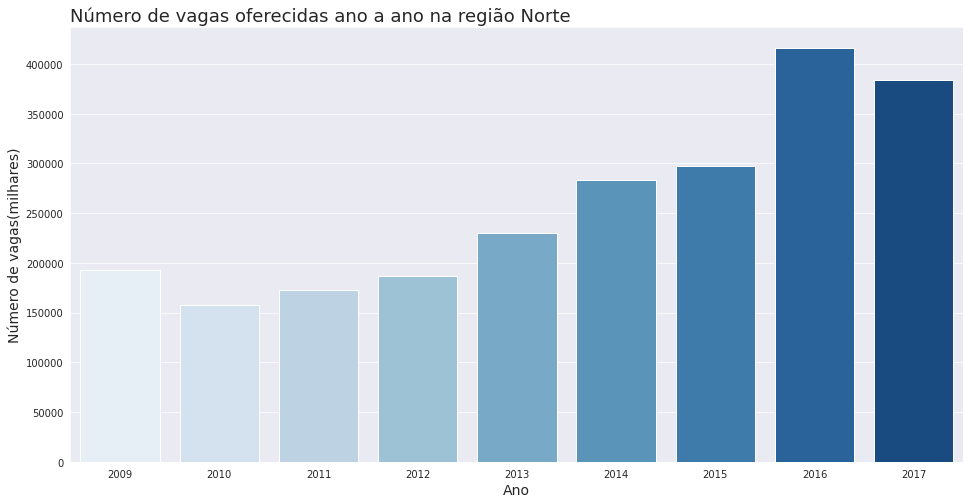

In [126]:
barplot('Número de vagas oferecidas ano a ano na região Norte', 'ano_censo', 'numero_de_vagas_oferecidas', dados_norte, 'Ano', 'Número de vagas(milhares)')

In [127]:
print('O total de vagas oferecidas foi de {} vagas'.format(dados_norte.numero_de_vagas_oferecidas.sum()))

O total de vagas oferecidas foi de 2321383.0 vagas


**SUDESTE**

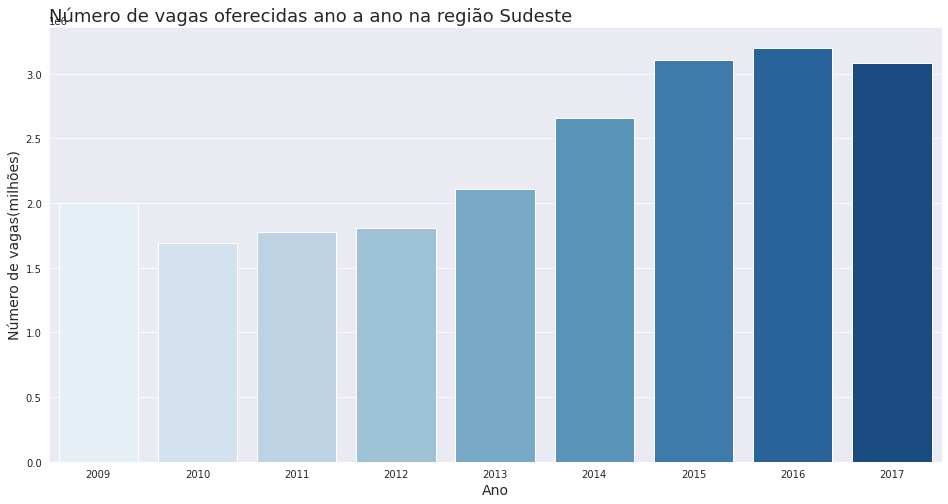

In [128]:
barplot('Número de vagas oferecidas ano a ano na região Sudeste', 'ano_censo', 'numero_de_vagas_oferecidas', dados_sudeste, 'Ano', 'Número de vagas(milhões)')

In [129]:
print('O total de vagas oferecidas foi de {} vagas'.format(dados_sudeste.numero_de_vagas_oferecidas.sum()))

O total de vagas oferecidas foi de 21438979.0 vagas


**SUL**

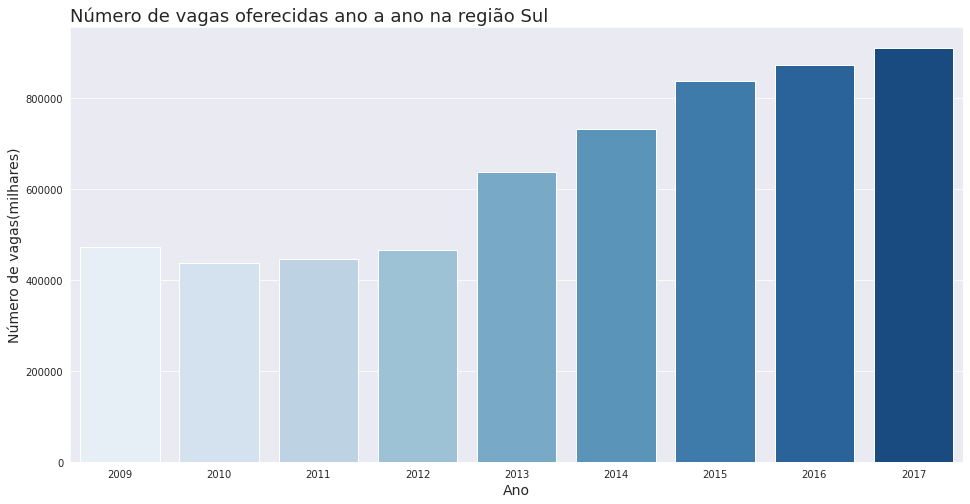

In [130]:
barplot('Número de vagas oferecidas ano a ano na região Sul', 'ano_censo', 'numero_de_vagas_oferecidas', dados_sul, 'Ano', 'Número de vagas(milhares)')

In [131]:
print('O total de vagas oferecidas foi de {} vagas'.format(dados_sul.numero_de_vagas_oferecidas.sum()))

O total de vagas oferecidas foi de 5814376.0 vagas


**CENTRO-OESTE**

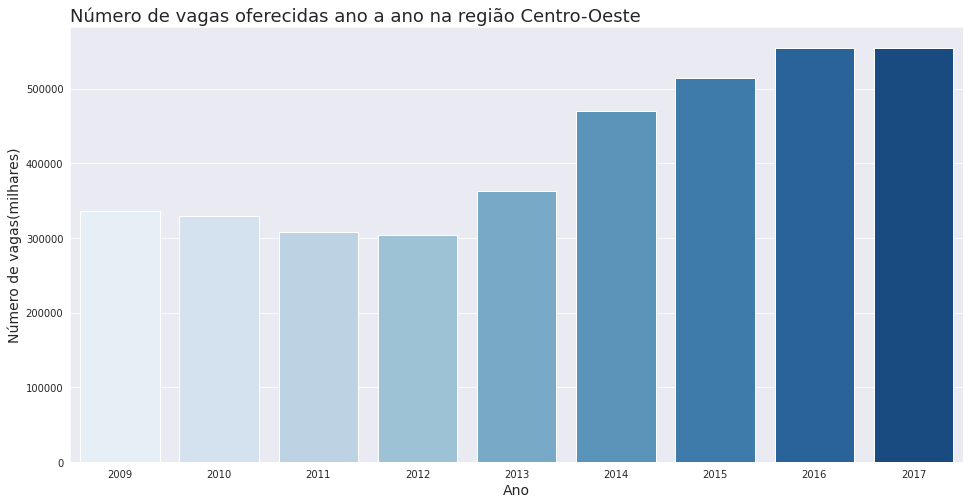

In [132]:
barplot('Número de vagas oferecidas ano a ano na região Centro-Oeste', 'ano_censo', 'numero_de_vagas_oferecidas', dados_centro_oeste, 'Ano', 'Número de vagas(milhares)')

In [133]:
print('O total de vagas oferecidas foi de {} vagas'.format(dados_centro_oeste.numero_de_vagas_oferecidas.sum()))

O total de vagas oferecidas foi de 3731773.0 vagas


# Avaliando se com o aumento das vagas, existem um maior número de ingressos.

Criando a coluna "aumento_das_vagas" no DataFrame prpincipal.

In [134]:
dados['aumento_das_vagas'] = dados.numero_de_vagas_oferecidas.diff() 
dados.fillna(value=0, inplace=True)

Gráfico de disperção análisando a correlação entre as colunas "aumento_das_vagas", "numero_de_inscritos".

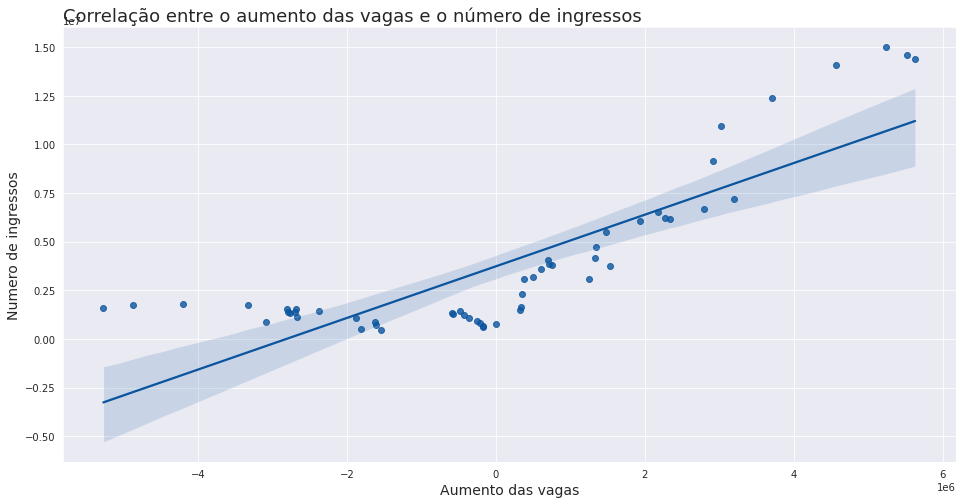

In [135]:
regplot('Correlação entre o aumento das vagas e o número de ingressos',
        dados.aumento_das_vagas,
        dados.numero_de_inscritos,
        'Aumento das vagas',
        'Numero de ingressos')

Com o uso de um gráfico de disperção é possível perceber que com o aumento das vagas oferecidas, também a um aumento no número de ingressos

# Informar se houve crescimento no número de matrículas por região e destacar casos expressivos (positivos ou negativos).

Gerando a coluna "aumento_matriculas" no DataFrame de todas as regiões.

In [ ]:
for regiao in dados_regioes:
  regiao['aumento_matriculas'] = regiao.numero_de_matriculas.diff()
  regiao.fillna(value= 0, inplace= True)

**NORDESTE**

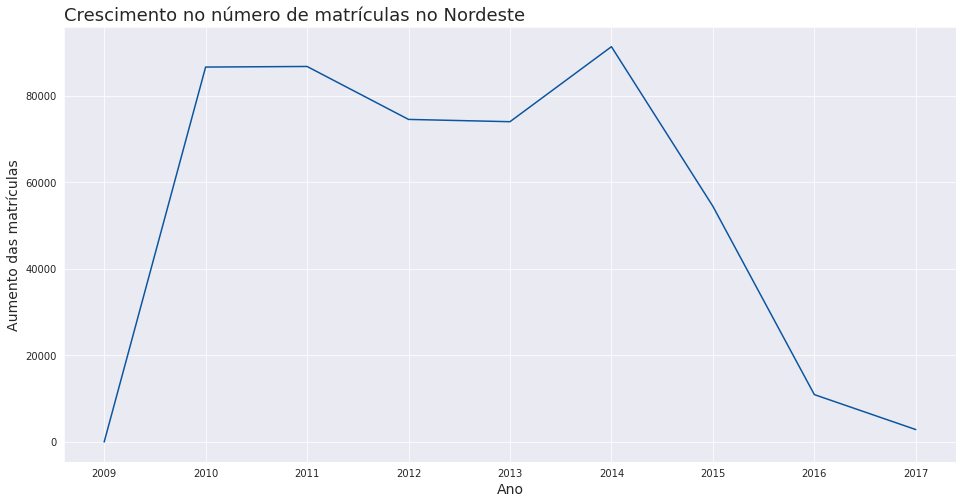

In [137]:
plotar('Crescimento no número de matrículas no Nordeste', 'ano_censo', 'aumento_matriculas', dados_nordeste, 'Ano', 'Aumento das matrículas')

Grande aumento de 2009 a 2010;<br>
Grande queda de 2014 a 2017.<br>

**NORTE**

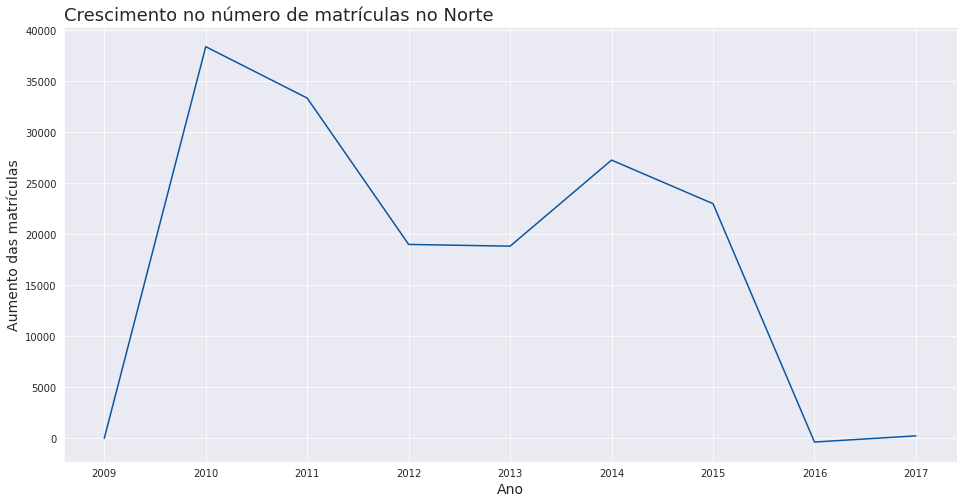

In [138]:
plotar('Crescimento no número de matrículas no Norte', 'ano_censo', 'aumento_matriculas', dados_norte, 'Ano', 'Aumento das matrículas')

Grande aumento de 2009 a 2010;<br>
Queda de 2010 a 2012;<br>
Queda de 2014 a 2016.<br> 

**SUDESTE**

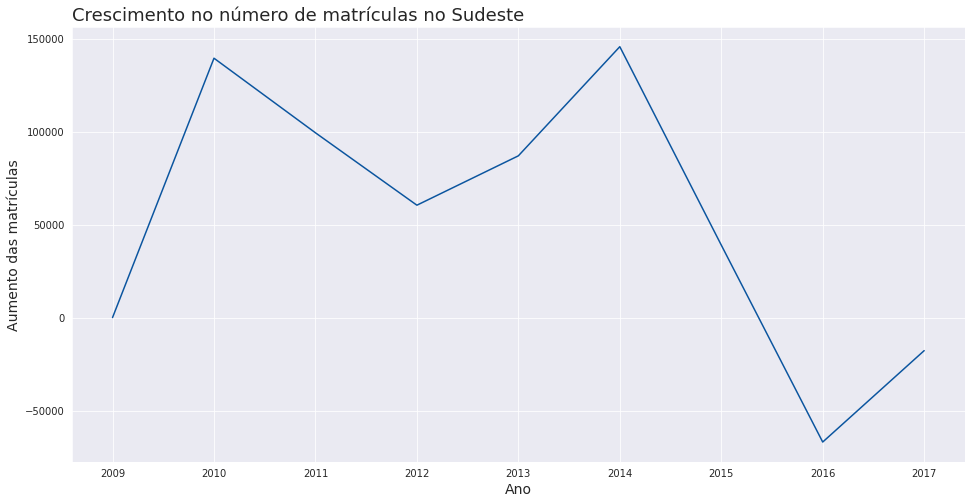

In [139]:
plotar('Crescimento no número de matrículas no Sudeste', 'ano_censo', 'aumento_matriculas', dados_sudeste, 'Ano', 'Aumento das matrículas')

Aumento de 2009 a 2010; <br>
Queda de 2010 a 2012;<br>
Aumento de 2012 a 2014;<br>
Grande queda de 2014 a 2016.<br>

**SUL**

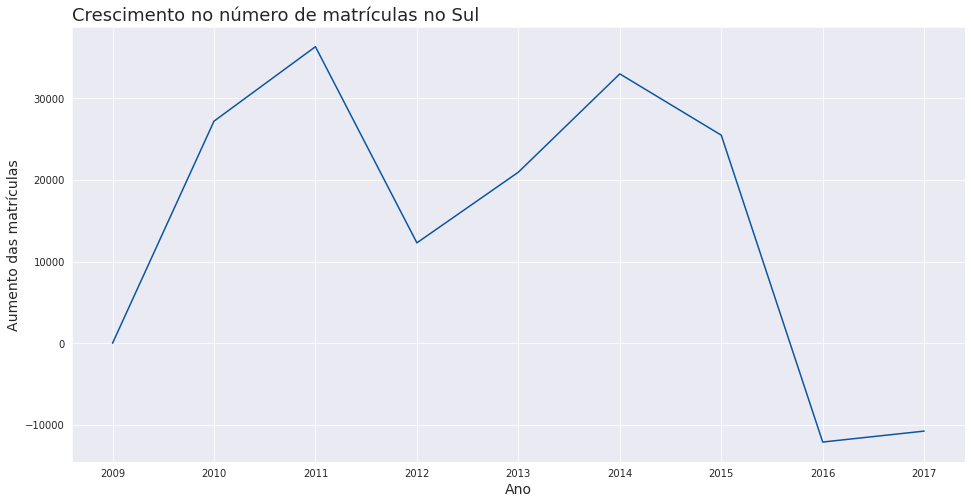

In [140]:
plotar('Crescimento no número de matrículas no Sul', 'ano_censo', 'aumento_matriculas', dados_sul, 'Ano', 'Aumento das matrículas')

Aumento de 2009 a 2011;<br>
Queda de 2011 a 2012;<br>
Aumento de 2012 a 2014;<br>
Grande queda de 2014 a 2016.

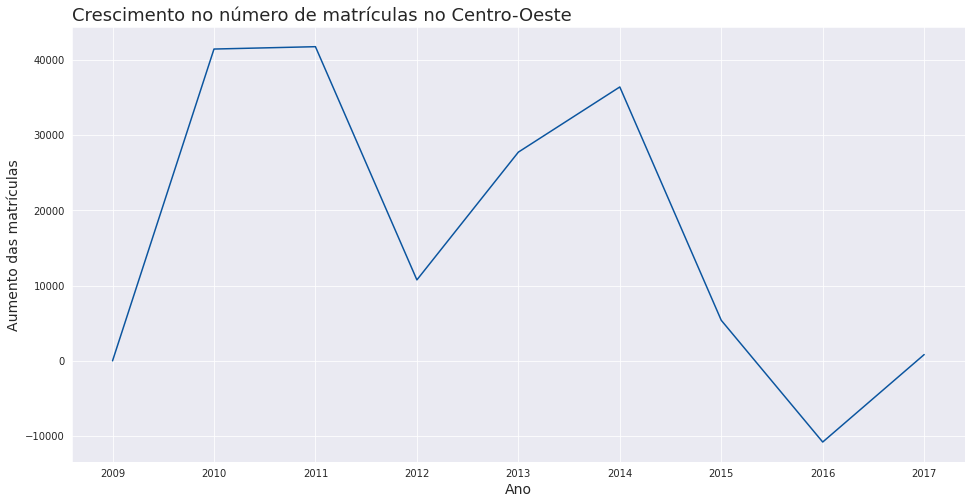

In [141]:
plotar('Crescimento no número de matrículas no Centro-Oeste', 'ano_censo', 'aumento_matriculas', dados_centro_oeste, 'Ano', 'Aumento das matrículas')

Aumento de 2009 a 2010;<br>
Queda de 2011 a 2012;<br>
Aumento de 2012 a 2014;<br>
Grande queda de 2014 a 2016.

# Informando o número de concluintes em cada região e apontando qual é a região com maior dificuldade.

In [142]:
soma = {'concluintes_nordeste' : dados_nordeste.numero_de_concluintes.sum(), 
        'concluintes_norte' : dados_norte.numero_de_concluintes.sum(), 
        'concluintes_sudeste' : dados_sudeste.numero_de_concluintes.sum(), 
        'concluintes_sul' : dados_sul.numero_de_concluintes.sum(), 
        'concluintes_centro_oeste' : dados_centro_oeste.numero_de_concluintes.sum()}
soma

{'concluintes_centro_oeste': 726798,
 'concluintes_nordeste': 1402277,
 'concluintes_norte': 507717,
 'concluintes_sudeste': 3996429,
 'concluintes_sul': 1234188}

<h4>Número de concluintes no Nordeste =  1402277;</h4>
Percentual de conclusão no Nordeste em relação as matrículas = 12.3%<br>

<h4>Número de concluintes no Norte =  507717;</h4> 
Percentual de conclusão no Norte em relação as matrículas = 13.5%<br>

<h4>Número de concluintes no Sudeste =  3996429;</h4> 
Percentual de conclusão no Sudeste em relação as matrículas = 15.4%<br>

<h4>Número de concluintes no Sul =  1234188;</h4> 
Percentual de conclusão no Sul em relação as matrículas = 14.3%<br>

<h4>Número de concluintes no Centro-Oeste =  726798;</h4> 
Percentual de conclusão no Centro_Oeste em relação as matrículas = 14.38%<br><br> 

É visível através do percentual de conclusão que a região Nordeste é a que apresenta a maior dificuldade na conclusão de cursos.

#  Analisando comparativamente o número de inscritos com o número de matrículas.

Gráfico de disperção comparando as colunas "numero_de_inscritos" e "numero_de_matriculas".

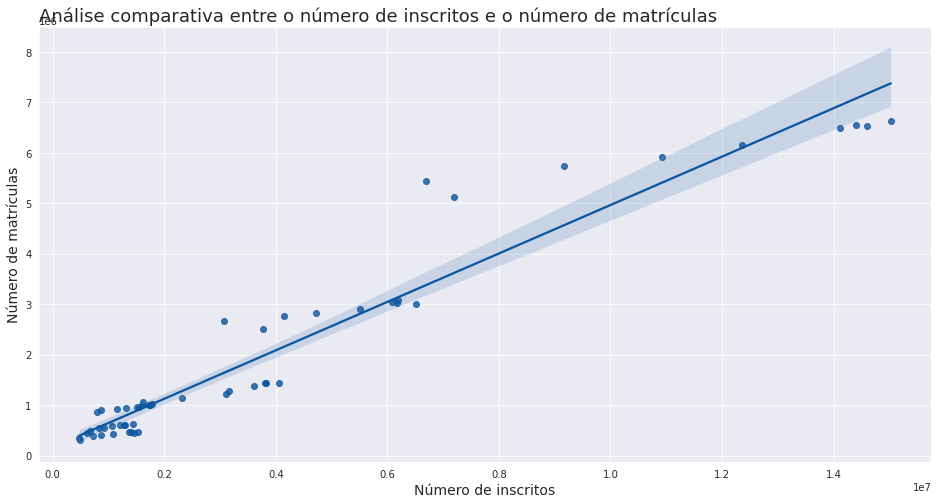

In [143]:
regplot('Análise comparativa entre o número de inscritos e o número de matrículas', 
        dados.numero_de_inscritos, 
        dados.numero_de_matriculas, 
        'Número de inscritos', 
        'Número de matrículas')

É possível, através de um grafico de disperção, perceber que sempre com o aumento do número de inscritos vem junto o aumento no número de matrículas, estando as duas colunas relacionadas.

# Verificando se o número de cursos ofertados na região impactam no aumento de inscritos e/ou número de matrículas.

Criando as colunas de "aumento_das_matriculas" e "aumento_dos_inscritos" no DataFrame principal e prenchendo os valores nulos criados com zero.

In [144]:
dados['aumento_das_matriculas'] = dados.numero_de_matriculas.diff() 

dados['aumento_dos_inscritos'] = dados.numero_de_inscritos.diff()

dados.fillna(value=0, inplace=True)

Gráfico de disperção demosntrando a correlação entre o numero de cursos e o aumento das matrículas.

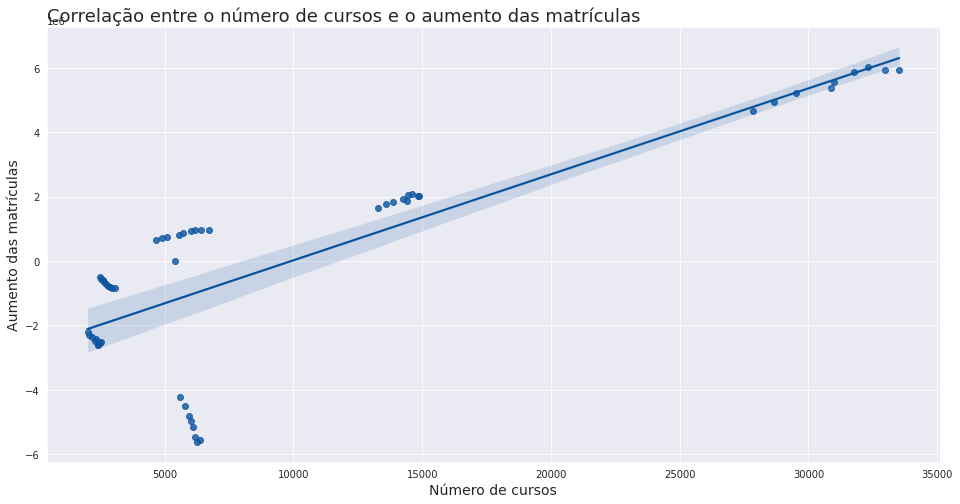

In [145]:
regplot('Correlação entre o número de cursos e o aumento das matrículas', 
        dados.numero_de_cursos, 
        dados.aumento_das_matriculas, 
        'Número de cursos', 
        'Aumento das matrículas')

Gráfico de disperção demosntrando a correlação entre o numero de cursos e o aumento dos inscritos.

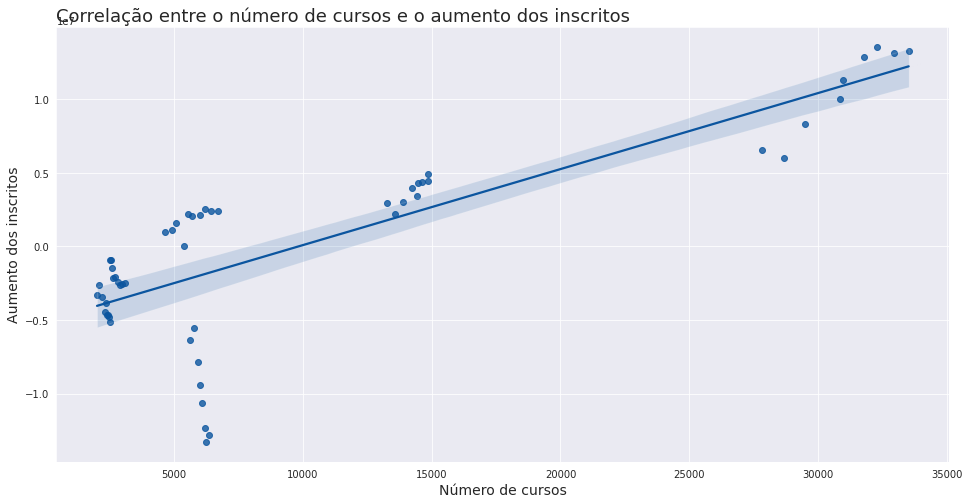

In [146]:
regplot('Correlação entre o número de cursos e o aumento dos inscritos', 
        dados.numero_de_cursos, 
        dados.aumento_dos_inscritos, 
        'Número de cursos', 
        'Aumento dos inscritos')

A partir dos dois gráficos acima é visível que com o aumento do número de cursos ofertados também existe um aumento não só das matrículas mas também do número de inscritos.

# Conclusão

  É perceptível que os cursos de todas a regiões apresentaram um aumento nas matrículas expressivo durante o período de tempo de 2009 a 2010, contudo os dados apresentam por padrão uma queda no número das mesmas apartir de 2014.<br>
  O número de vagas oferecidas tendeu sempre a aumentar com o passar dos anos e junto com ele o número de inscritos; o sudeste aparece na frente com 21.438.979 vagas oferecidas de 2009 até 2017.<br>
  A região nordeste apresenta a maior dificuldade na conclusão de cursos, com apenas 12.3% de conclusão em relação as matrículas.<br>
  Através de uma análise fica evidente que o aumento no número de cursos ofertados implica diretamente no número de inscritos e/ou matrículas, assim sendo, os dois correlacionados.
  